In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## https://www.youtube.com/watch?v=Ka5i9TVUT-E
## https://github.com/campusx-official/agglomerative-hierarchical-clustering-demo
## https://www.youtube.com/watch?v=OcoE7JlbXvY&list=PLaXDtXvwY-oDvedS3f4HW0b4KxqpJ_imw&index=32

### Limitation of K-Mean

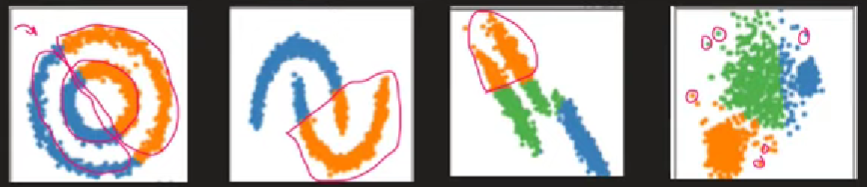

In [9]:
from sklearn.datasets import make_moons, make_circles

dummy_data1 = make_circles(n_samples=1000, shuffle=True, noise=0.03, random_state=40, factor=0.6)

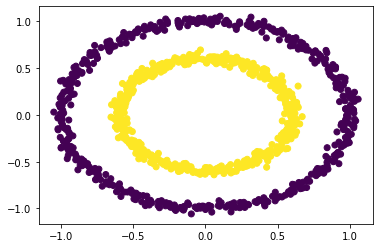

In [10]:
plt.scatter(dummy_data1[0][:,0], dummy_data1[0][:,1], c=dummy_data1[1])

### K-Mean creating wron cluster

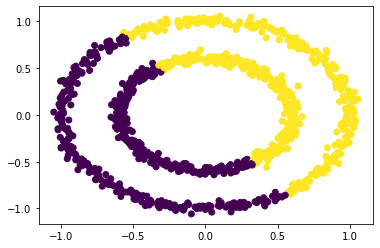

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(dummy_data1[0])
plt.scatter(dummy_data1[0][:,0], dummy_data1[0][:,1], c= kmeans.labels_)

### K-Mean limitation is over come by AgglomerativeClustering

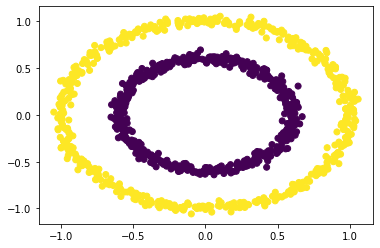

In [12]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="single")

clusters.fit_predict(dummy_data1[0])
plt.scatter(dummy_data1[0][:,0], dummy_data1[0][:,1], c=clusters.labels_)

In [13]:
from IPython.display import IFrame
IFrame("Hierarchical-clusterring.pdf", width=1000, height=800)

### Single linkage - does not perform well when there are outliers.
### Complet linkage -  handles outliers or noisy data. It has issues if one cluster is very small and another cluster is very big.


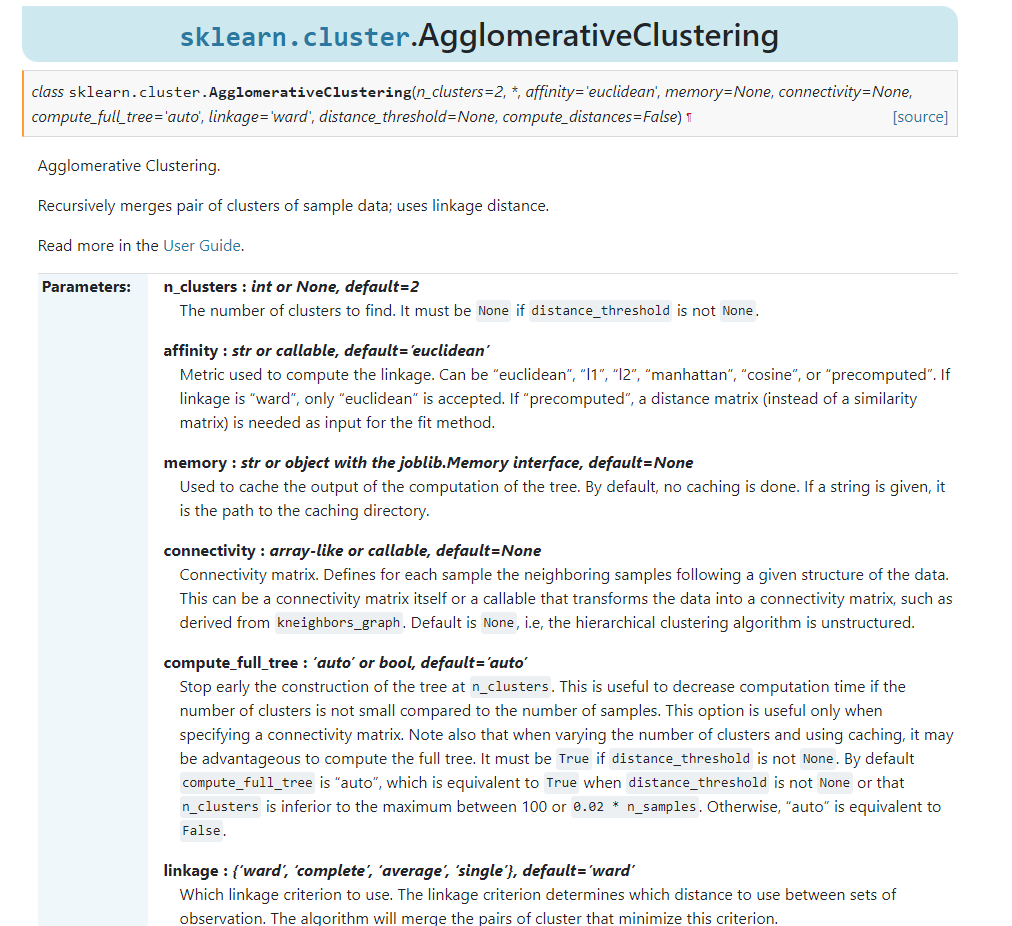

In [14]:
df = pd.read_csv("hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv")

In [15]:
df.shape

(200, 5)

In [16]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
data = df.iloc[:, 3:5].values

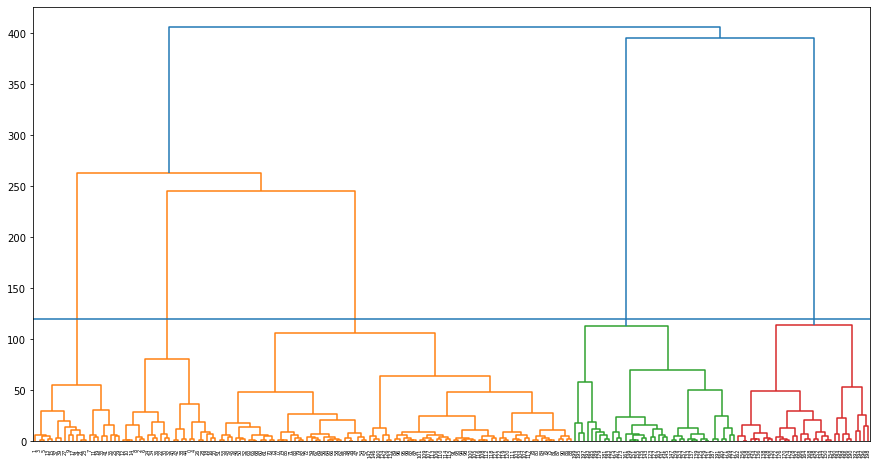

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,8))
dend = sch.dendrogram(sch.linkage(data, method='ward'))
plt.axhline(y=120)

In [19]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="complete")
labels_ = clusters.fit_predict(data)

labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

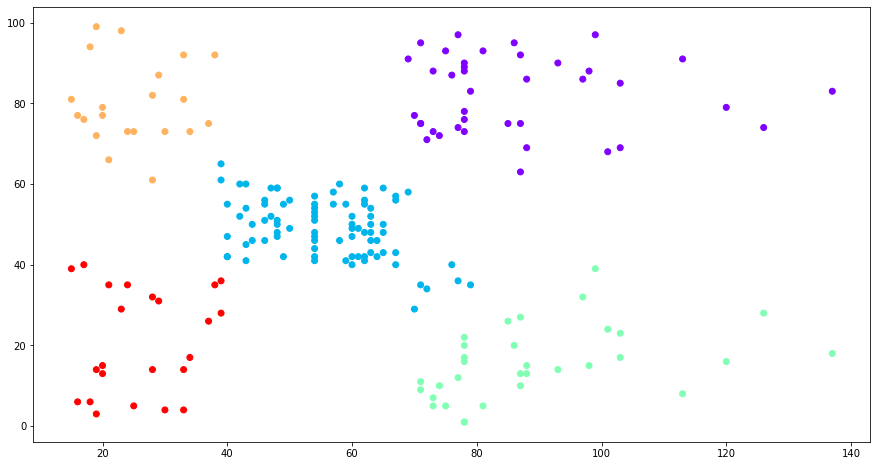

In [20]:

plt.figure(figsize=(15,8))
plt.scatter(data[:,0], data[:,1], c=clusters.labels_, cmap="rainbow")

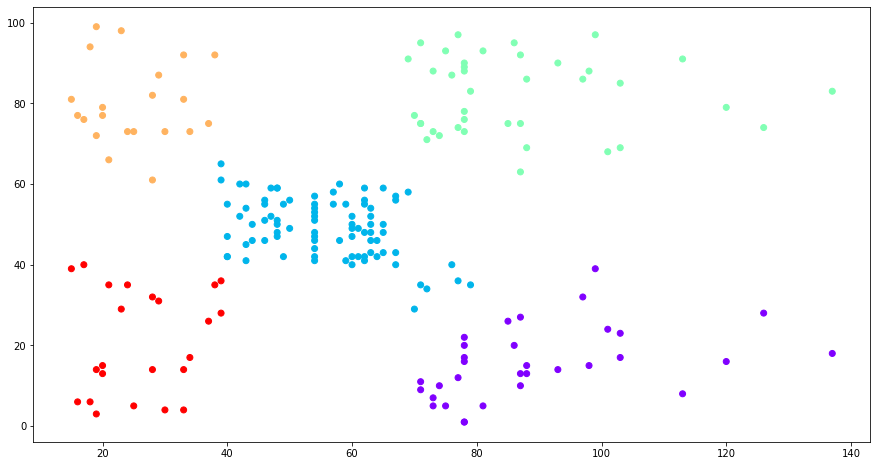

In [21]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")

clusters.fit_predict(data)
plt.figure(figsize=(15,8))
plt.scatter(data[:,0], data[:,1], c=clusters.labels_, cmap="rainbow")